# Pymaceuticals Inc.
---

### Analysis

The data showed: A total of 249 mice
- Capomulin had a mean tumor volume of 40.675741 with 230 observed mouse timepoints
- The distribution of unique female vs. male mice was 49.8% vs 50.2% respectively
- Infubinol regimen had potentiial outliers: Tumor Volume (mm3) 36.321346
- The Mouse Weight vs. Average Tumor Volume for Capomulin Regimen had a correlation coefficient(0.5256995552077169) with a positive linear regression


In [359]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [360]:
# Checking the number of mice.
combined_data_df['Mouse ID'].nunique()

249

In [361]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract the unique Mouse IDs from the duplicate entries
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Display the result
duplicate_mouse_ids

array(['g989'], dtype=object)

In [362]:
# Create a clean DataFrame by dropping the duplicate mice by their ID and Timepoint
cleaned_df = combined_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)


In [363]:
# Display the cleaned DataFrame
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [364]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

249

# Summary Statistics

In [365]:
cleaned_df.columns


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [366]:
cleaned_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1883.000000,1883.000000,1883.000000,1883.00000,1883.000000
mean,19.622942,50.449310,1.025491,12.77111,25.660648
std,14.090045,8.914637,1.139284,7.18380,3.931950
min,0.000000,22.050126,0.000000,1.00000,15.000000
25%,5.000000,45.000000,0.000000,7.00000,25.000000
50%,20.000000,48.951368,1.000000,13.00000,27.000000
75%,30.000000,56.346321,2.000000,20.00000,29.000000
max,45.000000,78.567014,4.000000,24.00000,30.000000


In [367]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Group by the treatment regimen
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_Std_Err=lambda x: x.std() / (len(x) ** 0.5)  # Standard Error of the Mean
).reset_index()

# Set the index to "Drug Regimen"
summary_stats.set_index('Drug Regimen', inplace=True)

summary_stats

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [368]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Var='var',
    Std_Dev='std',
    Sem=lambda x: x.std() / (len(x) ** 0.5)  # Standard Error of the Mean
).reset_index()

# Set the index to "Drug Regimen"
summary_stats.set_index('Drug Regimen', inplace=True)

# Display the header centered with HTML in Jupyter Notebook
from IPython.display import display, HTML

#Styled HTML representation
styled_summary_stats = summary_stats.style.set_caption("Tumor Volume (mm3)").set_table_attributes('style="text-align: center;"')

# Display the styled DataFrame
styled_summary_stats

,Mean,Median,Var,Std_Dev,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts


In [369]:
#grouping by regimen
clean_grp = cleaned_df.groupby('Drug Regimen')

In [370]:
#Counting rows
cleaned_df['Drug Regimen'].value_counts()

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     151
Name: count, dtype: int64

In [394]:
# Create a DataFrame from the cleaned data
clean_grp_df = pd.DataFrame({
    'Observed Mouse Timepoints': [
        230, 228, 188, 186, 
        182, 181, 181, 178, 
        178, 151
    ], 'Drug Regimen': [
        'Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 
        'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 
        'Ceftamin', 'Propriva'
    ]
})

# Display DataFrame
clean_grp_df


,Observed Mouse Timepoints,Drug Regimen
0,230,Capomulin
1,228,Ramicane
2,188,Ketapril
3,186,Naftisol
4,182,Zoniferol
5,181,Stelasyn
6,181,Placebo
7,178,Infubinol
8,178,Ceftamin
9,151,Propriva


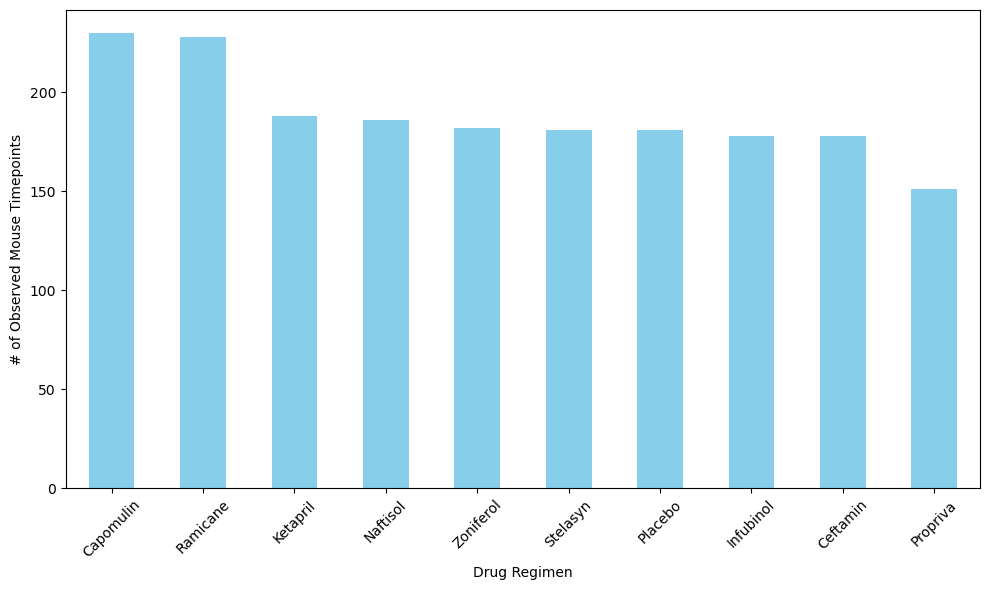

In [395]:
# Generate a bar plot using pandas
clean_grp_df.set_index('Drug Regimen')['Observed Mouse Timepoints'].plot(kind='bar', figsize=(10, 6), color='skyblue')

# Set the title and labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

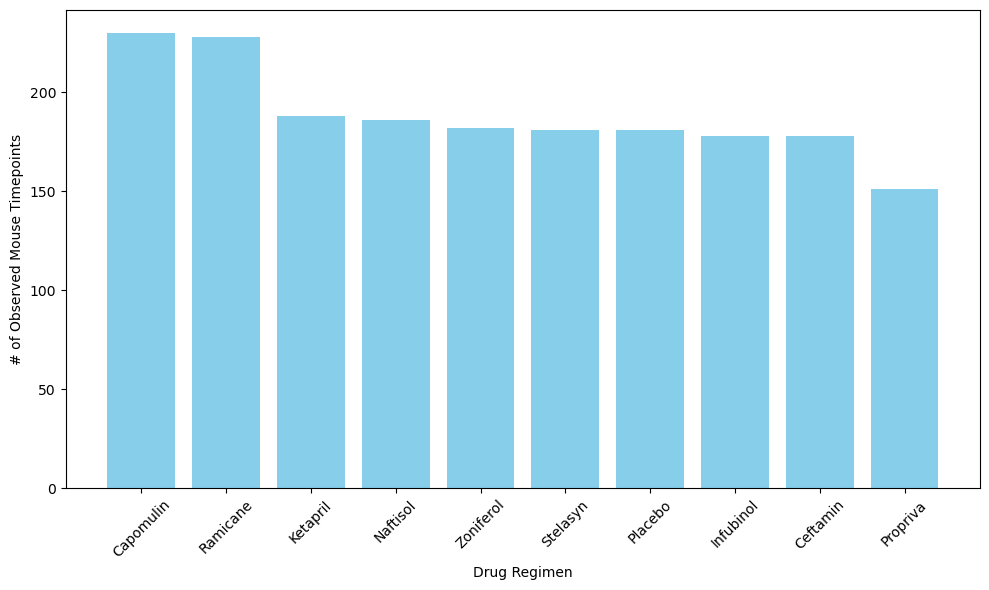

In [373]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(clean_grp_df['Drug Regimen'], clean_grp_df['Number of Rows'], color='skyblue')

# Set the title and labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [374]:
# Get unique mice with their gender
unique_mice = cleaned_df[['Mouse ID', 'Sex']].drop_duplicates()


In [375]:
# Count the unique mice by gender
gender_counts = unique_mice['Sex'].value_counts()

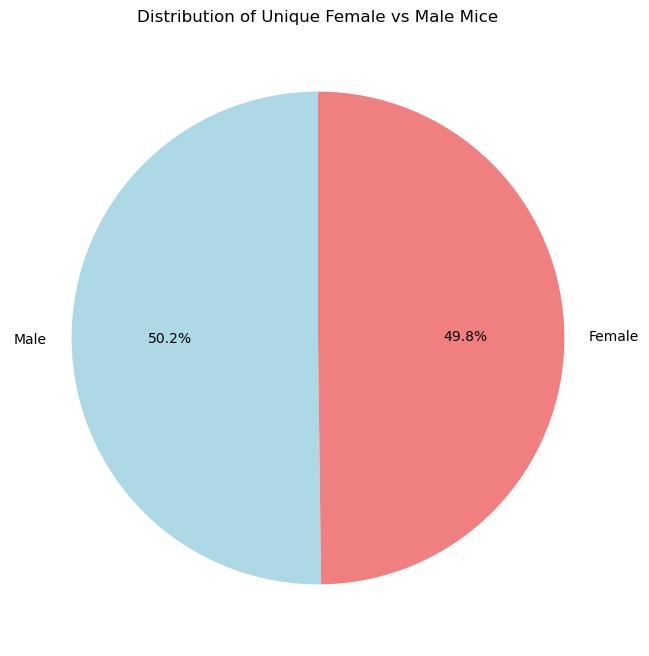

In [376]:
# Generate a pie chart using Pandas
gender_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Set the title
plt.title('Distribution of Unique Female vs Male Mice')

# Show the plot
plt.ylabel('')  # Hide the y-label
plt.show()

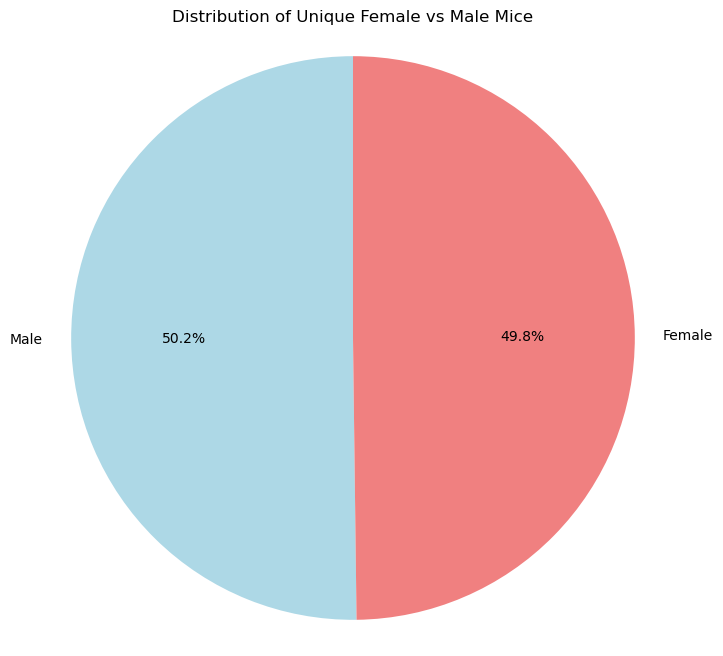

In [377]:
# Generate a pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Set the title
plt.title('Distribution of Unique Female vs Male Mice')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

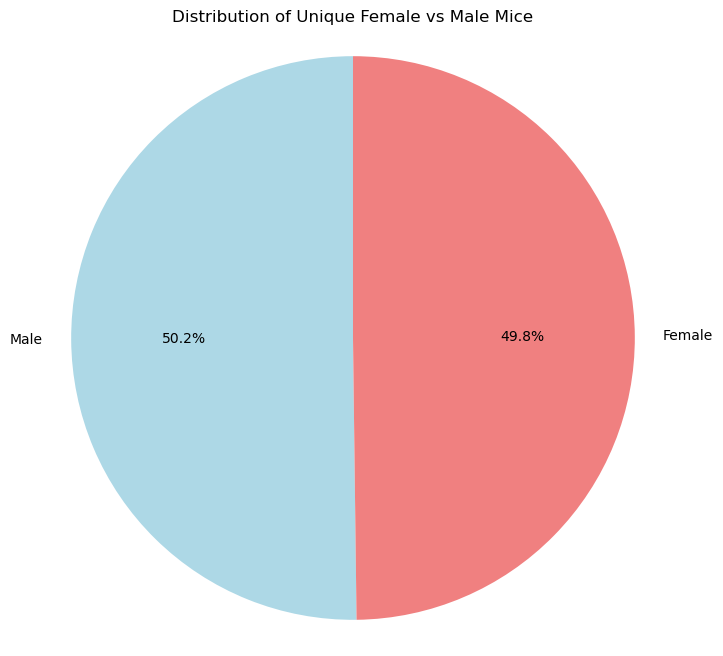

In [378]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Set the title
plt.title('Distribution of Unique Female vs Male Mice')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

Quartiles, Outliers and Boxplots

In [379]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Filter for the treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = cleaned_df[cleaned_df['Drug Regimen'].isin(treatment_regimens)]


In [380]:
# Get the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoints

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [381]:
# Merge to get the corresponding tumor volume for the last timepoint
merged_df = pd.merge(last_timepoints, filtered_df, on=['Mouse ID', 'Timepoint'])

In [382]:
# Select relevant columns (Mouse ID, Drug Regimen, Tumor Volume)
final_tumor_volumes = merged_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Display the final tumor volumes DataFrame
final_tumor_volumes

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [383]:
# Define a list of treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# list in a for loop for plotting labels
for regimen in treatment_regimens:
    print(regimen) 

Capomulin
Ramicane
Infubinol
Ceftamin


In [384]:
# Create a list to hold outlier information
outliers_info = {}

In [385]:
# Loop through each treatment regimen to calculate IQR and identify outliers
for regimen in treatment_regimens:
    # Filter the DataFrame for the current treatment regimen
    regimen_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == regimen]
    
    # Calculate the IQR
    Q1 = regimen_data['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = regimen_data['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine upper and lower bounds for outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Locate potential outliers
    outliers = regimen_data[(regimen_data['Tumor Volume (mm3)'] < lower_bound) | 
                            (regimen_data['Tumor Volume (mm3)'] > upper_bound)]
    
    # Store outlier information
    outliers_info[regimen] = outliers

# Display outlier information for each regimen
for regimen, outliers in outliers_info.items():
    print(f"{regimen}'s potentiial outliers:")
    print(outliers)

    

Capomulin's potentiial outliers:
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)]
Index: []
Ramicane's potentiial outliers:
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)]
Index: []
Infubinol's potentiial outliers:
   Mouse ID Drug Regimen  Tumor Volume (mm3)
15     c326    Infubinol           36.321346
Ceftamin's potentiial outliers:
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)]
Index: []


<Figure size 1000x600 with 0 Axes>

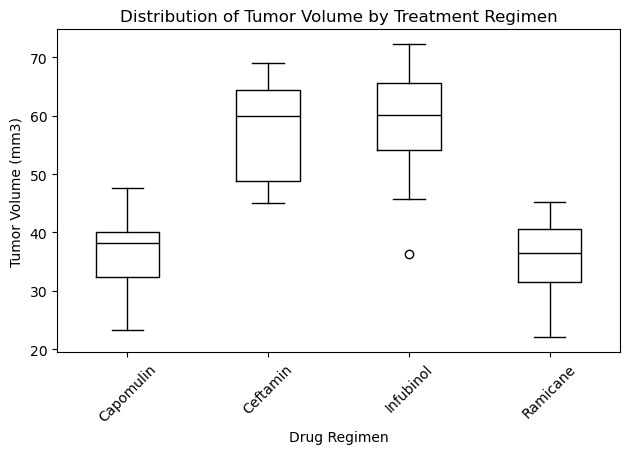

In [386]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
final_tumor_volumes.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False, color='black')

# Set the title and labels
plt.title('Distribution of Tumor Volume by Treatment Regimen')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

# Line and Scatter Plots

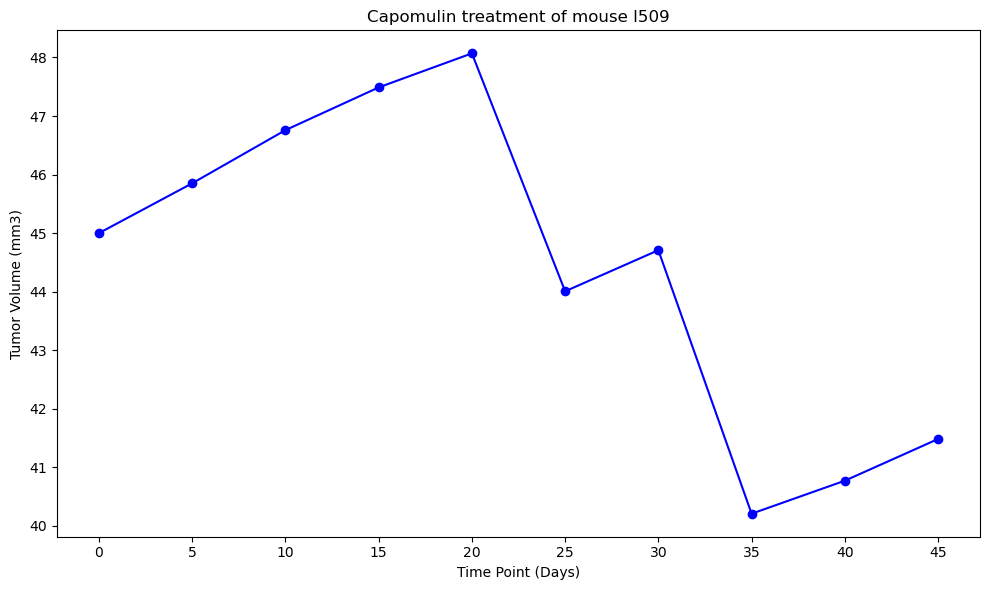

In [387]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter for a specific mouse treated with Capomulin
mouse_id = 'l509' 
mouse_data = cleaned_df[(cleaned_df['Mouse ID'] == mouse_id) & (cleaned_df['Drug Regimen'] == 'Capomulin')]

# Generate a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='-')

# Set the title and labels
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.xticks(mouse_data['Timepoint'])  # Show all time points on the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [388]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [389]:
capomulin_data['Weight (g)'].unique()

array([22, 21, 17, 15, 23, 25, 20, 19, 24])

In [390]:
print(capomulin_data.dtypes)

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object


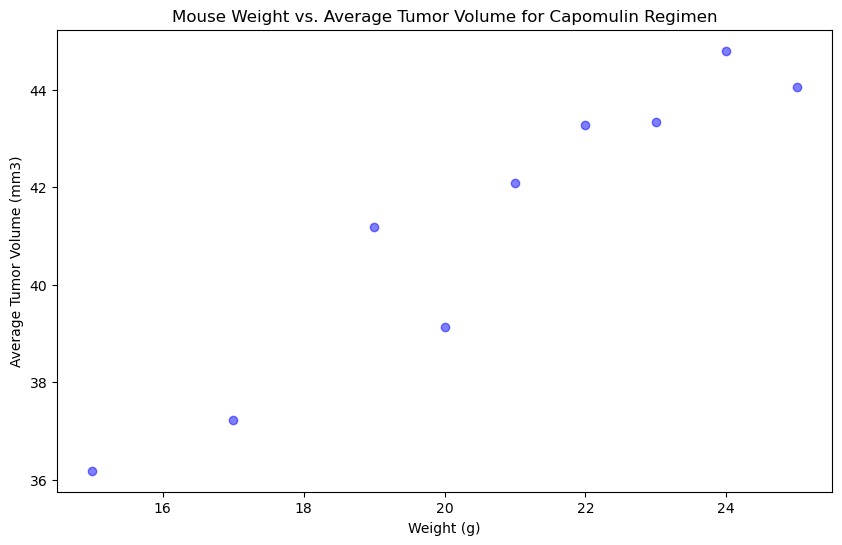

In [391]:
# Calculate the average tumor volume for each mouse weight
avg_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='blue', alpha=0.5)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [392]:
# Filter for Capomulin regimen
capomulin_data = capomulin_data[capomulin_data['Drug Regimen'] == 'Capomulin']


Correlation Coefficient: 0.5256995552077169
Slope: 0.9609669432428355
Intercept: 21.489827213299566


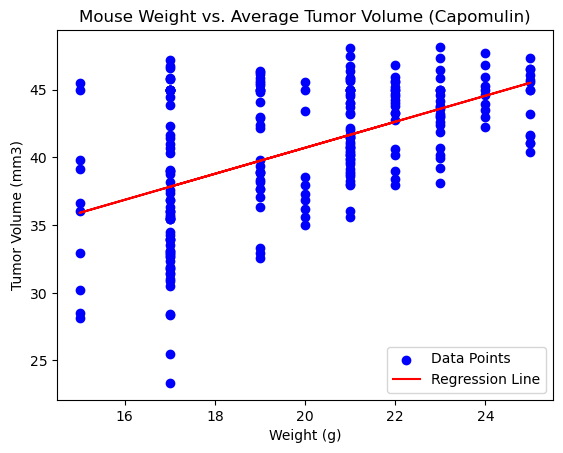

In [393]:
# Step 2: Calculate the correlation coefficient
correlation = capomulin_data['Weight (g)'].corr(capomulin_data['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation}")

# Step 3: Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])

# Print the slope and intercept for reference
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Step 4: Plot the results
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], color='blue', label='Data Points')
plt.plot(capomulin_data['Weight (g)'], slope * capomulin_data['Weight (g)'] + intercept, color='red', label='Regression Line')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.show()